In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
Health=pd.read_excel('Health.xlsx')
Health.head()

,sen,jens,dard ghafase sineh,feshar khun dar halat esterahat,kolestrol,ghand khun nashta,navar ghalb dar halat esterahat,hadaksar zaraban ghalb,anjin sadri nashi az varzesh,afsordegi st nashi az tamrin va varzesh nesbat be halat esterahat,shibe tamrin dar oje tamrin dar maghtae ST,tedad oroghe bozorg rangi ba flourosopy,talasemi,ehtemal voghu bimari ghalbi
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [3]:
Health=Health.rename(columns={'ehtemal voghu bimari ghalbi':'Outcome'})
Health.head(3)

,sen,jens,dard ghafase sineh,feshar khun dar halat esterahat,kolestrol,ghand khun nashta,navar ghalb dar halat esterahat,hadaksar zaraban ghalb,anjin sadri nashi az varzesh,afsordegi st nashi az tamrin va varzesh nesbat be halat esterahat,shibe tamrin dar oje tamrin dar maghtae ST,tedad oroghe bozorg rangi ba flourosopy,talasemi,Outcome
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1


In [4]:
from sklearn.model_selection import train_test_split
#Assumed you have, X (predictor) and Y (target) for training data set and x_test(predictor) of test_dataset
X=Health[['sen','jens','dard ghafase sineh','feshar khun dar halat esterahat','kolestrol','ghand khun nashta','navar ghalb dar halat esterahat','hadaksar zaraban ghalb','anjin sadri nashi az varzesh','afsordegi st nashi az tamrin va varzesh nesbat be halat esterahat','shibe tamrin dar oje tamrin dar maghtae ST','talasemi']]
y=Health['Outcome']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=0)

In [5]:
# Wrapper With  Ann PSO

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd
from pandas_ml import ConfusionMatrix
import datetime
import pandas_ml as pdml
import imblearn
# Import PySwarms
import pyswarms as ps

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

df = pd.read_excel('Health.xlsx')
#df = df.drop(['Time','Amount'],axis=1)
#X = df.iloc[:,:-1]
#y = df['Class']

X=Health[['sen','jens','dard ghafase sineh','feshar khun dar halat esterahat','kolestrol','ghand khun nashta','navar ghalb dar halat esterahat','hadaksar zaraban ghalb','anjin sadri nashi az varzesh','afsordegi st nashi az tamrin va varzesh nesbat be halat esterahat','shibe tamrin dar oje tamrin dar maghtae ST','talasemi']]
y=Health['Outcome']

# number_records_fraud = len(df[df.Class == 1])
# fraud_indices = np.array(df[df.Class == 1].index)

# # Picking the indices of the normal classes
# normal_indices = df[df.Class == 0].index

# # Out of the indices we picked, randomly select "x" number (number_records_fraud)
# random_normal_indices = np.random.choice(normal_indices, 3*number_records_fraud, replace = False)
# random_normal_indices = np.array(random_normal_indices)

# # Appending the 2 indices
# under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])

# # Under sample dataset
# under_sample_data = df.iloc[under_sample_indices,:]

# X = under_sample_data.ix[:, under_sample_data.columns != 'Class']
# y = under_sample_data.ix[:, under_sample_data.columns == 'Class']

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

data = scale(X)
pca = PCA(n_components=10)
X = pca.fit_transform(data)
print(X)
print(y)
print(type(X))
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
df2 = pdml.ModelFrame(X_train, target=y_train)
sampler = df2.imbalance.over_sampling.SMOTE()
oversampled = df2.fit_sample(sampler)
X, y = oversampled.iloc[:,1:11], oversampled['Outcome']

print(X)
print(type(X))
X=X.as_matrix()
y=y.as_matrix()
print(X)
print(type(X))

def forward_prop(params):
    """Forward propagation as objective function

    This computes for the forward propagation of the neural network, as
    well as the loss. It receives a set of parameters that must be
    rolled-back into the corresponding weights and biases.

    Inputs
    ------
    params: np.ndarray
        The dimensions should include an unrolled version of the
        weights and biases.

    Returns
    -------
    float
        The computed negative log-likelihood loss given the parameters
    """
    # Neural network architecture
    n_inputs = 10
    n_hidden = 20
    n_classes = 2

    # Roll-back the weights and biases
    W1 = params[0:200].reshape((n_inputs,n_hidden))
    b1 = params[200:220].reshape((n_hidden,))
    W2 = params[220:260].reshape((n_hidden,n_classes))
    b2 = params[260:262].reshape((n_classes,))

    #print(W1)
    #print(W2)

    # Perform forward propagation
    z1 = X.dot(W1) + b1  # Pre-activation in Layer 1
    a1 = np.tanh(z1)     # Activation in Layer 1
    z2 = a1.dot(W2) + b2 # Pre-activation in Layer 2
    logits = z2          # Logits for Layer 2

    # Compute for the softmax of the logits
    exp_scores = np.exp(logits)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

    # Compute for the negative log likelihood
    N = len(X) # Number of samples
    corect_logprobs = -np.log(probs[range(N), y])
    loss = np.sum(corect_logprobs) / N
    return loss

def f(x):
    """Higher-level method to do forward_prop in the
    whole swarm.

    Inputs
    ------
    x: numpy.ndarray of shape (n_particles, dimensions)
        The swarm that will perform the search

    Returns
    -------
    numpy.ndarray of shape (n_particles, )
        The computed loss for each particle
    """
    n_particles = x.shape[0]
    j = [forward_prop(x[i]) for i in range(n_particles)]
    print(datetime.datetime.now().time())
    return np.array(j)

# Initialize swarm
options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}

# Call instance of PSO
dimensions = 262
optimizer = ps.single.GlobalBestPSO(n_particles=50, dimensions=dimensions, options=options)

# Perform optimization
cost, pos = optimizer.optimize(f, print_step=1, iters=150, verbose=3)

#Pass X, pos to check for training set and X_test, pos for testing set
def predict(X, pos):
    """
    Use the trained weights to perform class predictions.

    Inputs
    ------
    X: numpy.ndarray
        Input Iris dataset
    pos: numpy.ndarray
        Position matrix found by the swarm. Will be rolled
        into weights and biases.
    """
    # Neural network architecture
    n_inputs = 10
    n_hidden = 20
    n_classes = 2

    # Roll-back the weights and biases
    W1 = pos[0:200].reshape((n_inputs,n_hidden))
    b1 = pos[200:220].reshape((n_hidden,))
    W2 = pos[220:260].reshape((n_hidden,n_classes))
    b2 = pos[260:262].reshape((n_classes,))

    # Perform forward propagation
    z1 = X.dot(W1) + b1  # Pre-activation in Layer 1
    a1 = np.tanh(z1)     # Activation in Layer 1
    z2 = a1.dot(W2) + b2 # Pre-activation in Layer 2
    logits = z2          # Logits for Layer 2

    y_pred = np.argmax(logits, axis=1)
    return y_pred
    print(y_pred)

[[ 1.38828936  1.33406684  3.44327815 ...  1.29219224  0.38779992
  -0.50802052]
 [ 2.53157665  1.26990087 -0.63439288 ... -0.91931425  1.02500587
   1.04124644]
 [ 2.82733451 -0.68857645 -0.37631964 ...  0.17049075  0.06364086
   0.13978765]
 ...
 [ 2.21376223  0.05447609  2.11303092 ...  0.52054735 -1.60830955
   0.99242719]
 [ 1.94325279 -2.30961818 -0.08870888 ... -1.08001929  0.25768564
  -0.50327746]
 [-1.51995365  1.37480367 -0.13637849 ... -0.2395704   0.13751982
  -0.93371892]]
0      0
1      1
2      1
3      0
4      0
5      0
6      1
7      0
8      1
9      1
10     0
11     0
12     1
13     0
14     0
15     0
16     1
17     0
18     0
19     0
20     0
21     0
22     1
23     1
24     1
25     0
26     0
27     0
28     0
29     1
      ..
267    0
268    1
269    0
270    1
271    0
272    0
273    0
274    1
275    0
276    1
277    0
278    1
279    0
280    1
281    1
282    1
283    0
284    0
285    1
286    0
287    1
288    1
289    1
290    0
291    1
292 

INFO:pyswarms.single.global_best:Iteration 1/150, cost: 0.6164246765910629
INFO:pyswarms.single.global_best:Iteration 2/150, cost: 0.6103800047537332


            0         1         2         3         4         5         6  \
0    0.359043 -0.478038 -1.196012 -1.350938  0.451145  1.910035 -1.245424   
1    0.621705 -0.383330  1.087039 -2.756279  0.510644  1.135158  1.597337   
2   -1.748255  0.807710 -0.508229  1.358312  0.063417 -0.757197  0.522604   
3    0.178695  0.269357  0.038703  0.841490 -1.556206  0.833097 -0.211277   
4   -0.756690 -0.046718 -0.361287 -1.975666 -0.983201  0.157030  0.358294   
5    0.693285  1.665160 -0.775157  1.818460  1.363071  0.966014 -1.618129   
6    1.426578 -0.149783 -1.396302  0.035249  1.406922 -0.649799  0.421426   
7    1.120785 -1.091626 -0.503981 -1.269311  1.006655 -1.021362 -0.341310   
8   -0.988331 -0.275733  1.221033 -0.881730 -0.639467  0.049358 -1.431117   
9   -0.702837 -1.503357  0.932560  0.909149  0.207725 -0.506145 -0.345953   
10   1.069172 -0.932002 -1.486574 -0.560332 -0.967370  1.448769  0.332442   
11   0.060604  0.320396 -1.447643 -0.038300 -0.790805  0.826968  1.287852   

INFO:pyswarms.single.global_best:Iteration 3/150, cost: 0.6103800047537332
INFO:pyswarms.single.global_best:Iteration 4/150, cost: 0.6103800047537332


15:10:56.361293
15:10:56.397293
15:10:56.445295
15:10:56.485295


INFO:pyswarms.single.global_best:Iteration 5/150, cost: 0.6103800047537332
INFO:pyswarms.single.global_best:Iteration 6/150, cost: 0.6103800047537332
INFO:pyswarms.single.global_best:Iteration 7/150, cost: 0.5854348781304369


15:10:56.597298
15:10:56.629368
15:10:56.666734
15:10:56.686735
15:10:56.730903
15:10:56.746530
15:10:56.798450


INFO:pyswarms.single.global_best:Iteration 8/150, cost: 0.5854348781304369
INFO:pyswarms.single.global_best:Iteration 9/150, cost: 0.5663039802039332
INFO:pyswarms.single.global_best:Iteration 10/150, cost: 0.5501397082326843
INFO:pyswarms.single.global_best:Iteration 11/150, cost: 0.4391800735016917


15:10:56.830567
15:10:56.865142
15:10:56.880767
15:10:56.920626
15:10:56.944628
15:10:56.976627
15:10:57.004629
15:10:57.040630


INFO:pyswarms.single.global_best:Iteration 12/150, cost: 0.4391800735016917
INFO:pyswarms.single.global_best:Iteration 13/150, cost: 0.4391800735016917
INFO:pyswarms.single.global_best:Iteration 14/150, cost: 0.4391800735016917


15:10:57.071336
15:10:57.100827
15:10:57.136748
15:10:57.176751
15:10:57.212752
15:10:57.248752


INFO:pyswarms.single.global_best:Iteration 15/150, cost: 0.407925434914349
INFO:pyswarms.single.global_best:Iteration 16/150, cost: 0.4060543169963739
INFO:pyswarms.single.global_best:Iteration 17/150, cost: 0.4060543169963739


15:10:57.284755
15:10:57.326332
15:10:57.350251
15:10:57.396437
15:10:57.436439
15:10:57.468524


INFO:pyswarms.single.global_best:Iteration 18/150, cost: 0.4060543169963739
INFO:pyswarms.single.global_best:Iteration 19/150, cost: 0.3785081710166399
INFO:pyswarms.single.global_best:Iteration 20/150, cost: 0.3785081710166399


15:10:57.504448
15:10:57.552447
15:10:57.580644
15:10:57.612645
15:10:57.640647
15:10:57.672648
15:10:57.700648


INFO:pyswarms.single.global_best:Iteration 21/150, cost: 0.3785081710166399
INFO:pyswarms.single.global_best:Iteration 22/150, cost: 0.3763158235579705
INFO:pyswarms.single.global_best:Iteration 23/150, cost: 0.3694404944568653
INFO:pyswarms.single.global_best:Iteration 24/150, cost: 0.3534782485616967


15:10:57.736647
15:10:57.764648
15:10:57.792651
15:10:57.816652
15:10:57.848650
15:10:57.872652
15:10:57.904744


INFO:pyswarms.single.global_best:Iteration 25/150, cost: 0.3534782485616967
INFO:pyswarms.single.global_best:Iteration 26/150, cost: 0.3534782485616967
INFO:pyswarms.single.global_best:Iteration 27/150, cost: 0.3534782485616967


15:10:57.940531
15:10:57.972532
15:10:58.008536
15:10:58.044534
15:10:58.072823
15:10:58.111473
15:10:58.140270


INFO:pyswarms.single.global_best:Iteration 28/150, cost: 0.3534782485616967
INFO:pyswarms.single.global_best:Iteration 29/150, cost: 0.3445787030034901
INFO:pyswarms.single.global_best:Iteration 30/150, cost: 0.3445787030034901
INFO:pyswarms.single.global_best:Iteration 31/150, cost: 0.3445787030034901


15:10:58.199131
15:10:58.231133
15:10:58.291319
15:10:58.322570
15:10:58.359112
15:10:58.391112


INFO:pyswarms.single.global_best:Iteration 32/150, cost: 0.3445787030034901
INFO:pyswarms.single.global_best:Iteration 33/150, cost: 0.3373856120746704
INFO:pyswarms.single.global_best:Iteration 34/150, cost: 0.3373856120746704


15:10:58.435115
15:10:58.471114
15:10:58.516749
15:10:58.548887
15:10:58.588757
15:10:58.616757


INFO:pyswarms.single.global_best:Iteration 35/150, cost: 0.3373856120746704
INFO:pyswarms.single.global_best:Iteration 36/150, cost: 0.3308060964456939
INFO:pyswarms.single.global_best:Iteration 37/150, cost: 0.32668737026457134
INFO:pyswarms.single.global_best:Iteration 38/150, cost: 0.32668737026457134


15:10:58.668760
15:10:58.700759
15:10:58.732760
15:10:58.756763
15:10:58.784761
15:10:58.816764
15:10:58.848764
15:10:58.860813


INFO:pyswarms.single.global_best:Iteration 39/150, cost: 0.32605100189495173
INFO:pyswarms.single.global_best:Iteration 40/150, cost: 0.3247427903658261
INFO:pyswarms.single.global_best:Iteration 41/150, cost: 0.3206252020877276


15:10:58.910772
15:10:58.938602
15:10:58.970603
15:10:58.998949
15:10:59.040447
15:10:59.076449


INFO:pyswarms.single.global_best:Iteration 42/150, cost: 0.3152613908706718
INFO:pyswarms.single.global_best:Iteration 43/150, cost: 0.3152613908706718
INFO:pyswarms.single.global_best:Iteration 44/150, cost: 0.31342288308197647


15:10:59.112308
15:10:59.152181
15:10:59.192181
15:10:59.228185
15:10:59.265795
15:10:59.289793


INFO:pyswarms.single.global_best:Iteration 45/150, cost: 0.3110024207566155
INFO:pyswarms.single.global_best:Iteration 46/150, cost: 0.31034833197091605
INFO:pyswarms.single.global_best:Iteration 47/150, cost: 0.31034833197091605


15:10:59.336275
15:10:59.368274
15:10:59.416276
15:10:59.448277
15:10:59.496276
15:10:59.528278


INFO:pyswarms.single.global_best:Iteration 48/150, cost: 0.30661248852613854
INFO:pyswarms.single.global_best:Iteration 49/150, cost: 0.30637773035878585
INFO:pyswarms.single.global_best:Iteration 50/150, cost: 0.30593308191985286


15:10:59.564280
15:10:59.600281
15:10:59.640492
15:10:59.668992
15:10:59.709605
15:10:59.734003


INFO:pyswarms.single.global_best:Iteration 51/150, cost: 0.30593308191985286


15:10:59.784305
15:10:59.819792
15:10:59.965711
15:10:59.985705


INFO:pyswarms.single.global_best:Iteration 52/150, cost: 0.30593308191985286
INFO:pyswarms.single.global_best:Iteration 53/150, cost: 0.3047629509611702
INFO:pyswarms.single.global_best:Iteration 54/150, cost: 0.301907120468134


15:11:00.035617
15:11:00.095593
15:11:00.127594
15:11:00.183595
15:11:00.219490


INFO:pyswarms.single.global_best:Iteration 55/150, cost: 0.3007515110794316
INFO:pyswarms.single.global_best:Iteration 56/150, cost: 0.30014192455177113
INFO:pyswarms.single.global_best:Iteration 57/150, cost: 0.2992573313496384
INFO:pyswarms.single.global_best:Iteration 58/150, cost: 0.2985501401771796


15:11:00.255312
15:11:00.291312
15:11:00.323313
15:11:00.355481
15:11:00.386733
15:11:00.422349
15:11:00.437977


INFO:pyswarms.single.global_best:Iteration 59/150, cost: 0.2960670482017815
INFO:pyswarms.single.global_best:Iteration 60/150, cost: 0.2939232704491144
INFO:pyswarms.single.global_best:Iteration 61/150, cost: 0.29301200833280255
INFO:pyswarms.single.global_best:Iteration 62/150, cost: 0.2925142769521338


15:11:00.480994
15:11:00.504991
15:11:00.540994
15:11:00.564992
15:11:00.588904
15:11:00.604532
15:11:00.640435
15:11:00.675874


INFO:pyswarms.single.global_best:Iteration 63/150, cost: 0.29222419104932845
INFO:pyswarms.single.global_best:Iteration 64/150, cost: 0.2918248166832291
INFO:pyswarms.single.global_best:Iteration 65/150, cost: 0.2906704930999644
INFO:pyswarms.single.global_best:Iteration 66/150, cost: 0.2906704930999644


15:11:00.708071
15:11:00.739325
15:11:00.768203
15:11:00.792203
15:11:00.808682
15:11:00.839932
15:11:00.875462
15:11:00.891090


INFO:pyswarms.single.global_best:Iteration 67/150, cost: 0.2888712015853878
INFO:pyswarms.single.global_best:Iteration 68/150, cost: 0.28718464128948534
INFO:pyswarms.single.global_best:Iteration 69/150, cost: 0.2847068854377364
INFO:pyswarms.single.global_best:Iteration 70/150, cost: 0.28329635181474333


15:11:00.938978
15:11:00.962978
15:11:00.997726
15:11:01.017727
15:11:01.051624
15:11:01.075625
15:11:01.094170
15:11:01.125420


INFO:pyswarms.single.global_best:Iteration 71/150, cost: 0.2812054004357766
INFO:pyswarms.single.global_best:Iteration 72/150, cost: 0.27936881439585876
INFO:pyswarms.single.global_best:Iteration 73/150, cost: 0.2773860543081716
INFO:pyswarms.single.global_best:Iteration 74/150, cost: 0.27521425841424974


15:11:01.164094
15:11:01.188096
15:11:01.212160
15:11:01.240325
15:11:01.272322
15:11:01.292324
15:11:01.324324
15:11:01.348610


INFO:pyswarms.single.global_best:Iteration 75/150, cost: 0.27297609083811436
INFO:pyswarms.single.global_best:Iteration 76/150, cost: 0.2712480135418906
INFO:pyswarms.single.global_best:Iteration 77/150, cost: 0.2694430166275589


15:11:01.380611
15:11:01.404613
15:11:01.428712
15:11:01.460198
15:11:01.480504
15:11:01.524755
15:11:01.556754


INFO:pyswarms.single.global_best:Iteration 78/150, cost: 0.2672613350541344
INFO:pyswarms.single.global_best:Iteration 79/150, cost: 0.26599621203178553
INFO:pyswarms.single.global_best:Iteration 80/150, cost: 0.26310414872949195
INFO:pyswarms.single.global_best:Iteration 81/150, cost: 0.2609088104788491


15:11:01.584762
15:11:01.608755
15:11:01.640757
15:11:01.672760
15:11:01.696760
15:11:01.724816
15:11:01.752814
15:11:01.780926


INFO:pyswarms.single.global_best:Iteration 82/150, cost: 0.2583954017426919
INFO:pyswarms.single.global_best:Iteration 83/150, cost: 0.2556445451993844
INFO:pyswarms.single.global_best:Iteration 84/150, cost: 0.25392748518611025


15:11:01.823221
15:11:01.867220
15:11:01.903657
15:11:01.931531
15:11:01.971035
15:11:02.003035


INFO:pyswarms.single.global_best:Iteration 85/150, cost: 0.2530329841476762
INFO:pyswarms.single.global_best:Iteration 86/150, cost: 0.2515945578164456
INFO:pyswarms.single.global_best:Iteration 87/150, cost: 0.2509428578936206


15:11:02.047038
15:11:02.082876
15:11:02.123324
15:11:02.160585
15:11:02.200587
15:11:02.240587


INFO:pyswarms.single.global_best:Iteration 88/150, cost: 0.24978519594421544
INFO:pyswarms.single.global_best:Iteration 89/150, cost: 0.24950021296496314
INFO:pyswarms.single.global_best:Iteration 90/150, cost: 0.2489271883614498
INFO:pyswarms.single.global_best:Iteration 91/150, cost: 0.24762619340560216


15:11:02.288588
15:11:02.324589
15:11:02.356592
15:11:02.385057
15:11:02.416553
15:11:02.456973
15:11:02.483569


INFO:pyswarms.single.global_best:Iteration 92/150, cost: 0.24640664308319812
INFO:pyswarms.single.global_best:Iteration 93/150, cost: 0.24453101673002703


15:11:02.539059
15:11:02.571117
15:11:02.603416
15:11:02.736025


INFO:pyswarms.single.global_best:Iteration 94/150, cost: 0.2434113313811302
INFO:pyswarms.single.global_best:Iteration 95/150, cost: 0.2423982874457296
INFO:pyswarms.single.global_best:Iteration 96/150, cost: 0.24159262497279604


15:11:02.782903
15:11:02.818865
15:11:02.854870
15:11:02.878866
15:11:02.918866
15:11:02.950868
15:11:02.990871

INFO:pyswarms.single.global_best:Iteration 97/150, cost: 0.24120912002227352
INFO:pyswarms.single.global_best:Iteration 98/150, cost: 0.24018005360449993



15:11:03.030872
15:11:03.091959
15:11:03.127983
15:11:03.168007
15:11:03.193026


INFO:pyswarms.single.global_best:Iteration 99/150, cost: 0.23898284994477234
INFO:pyswarms.single.global_best:Iteration 100/150, cost: 0.2385745785139866
INFO:pyswarms.single.global_best:Iteration 101/150, cost: 0.23785144722664503
INFO:pyswarms.single.global_best:Iteration 102/150, cost: 0.23669915730134017


15:11:03.238055
15:11:03.270079
15:11:03.311630
15:11:03.343632
15:11:03.375836
15:11:03.399801


INFO:pyswarms.single.global_best:Iteration 103/150, cost: 0.2355563595636933
INFO:pyswarms.single.global_best:Iteration 104/150, cost: 0.23526808238972674
INFO:pyswarms.single.global_best:Iteration 105/150, cost: 0.23372944357872272


15:11:03.452933
15:11:03.477091
15:11:03.517432
15:11:03.541432
15:11:03.574861
15:11:03.602863
15:11:03.627070


INFO:pyswarms.single.global_best:Iteration 106/150, cost: 0.2329367303211093
INFO:pyswarms.single.global_best:Iteration 107/150, cost: 0.2317676905798753
INFO:pyswarms.single.global_best:Iteration 108/150, cost: 0.23114769327540943
INFO:pyswarms.single.global_best:Iteration 109/150, cost: 0.2305388950712602


15:11:03.662555
15:11:03.690554
15:11:03.708882
15:11:03.752869
15:11:03.776871
15:11:03.804267
15:11:03.828193


INFO:pyswarms.single.global_best:Iteration 110/150, cost: 0.2301168583866946
INFO:pyswarms.single.global_best:Iteration 111/150, cost: 0.2292180153022474
INFO:pyswarms.single.global_best:Iteration 112/150, cost: 0.2284236322089237


15:11:03.869817
15:11:03.901999
15:11:03.938001
15:11:03.962001
15:11:03.998347
15:11:04.018347
15:11:04.046413
15:11:04.062044

INFO:pyswarms.single.global_best:Iteration 113/150, cost: 0.22743781730834675
INFO:pyswarms.single.global_best:Iteration 114/150, cost: 0.22674373033809067
INFO:pyswarms.single.global_best:Iteration 115/150, cost: 0.2259697089031704
INFO:pyswarms.single.global_best:Iteration 116/150, cost: 0.2248285665634912



15:11:04.109876
15:11:04.141876
15:11:04.177877
15:11:04.201877
15:11:04.241879
15:11:04.269881


INFO:pyswarms.single.global_best:Iteration 117/150, cost: 0.22390274575126973
INFO:pyswarms.single.global_best:Iteration 118/150, cost: 0.22324072958883145
INFO:pyswarms.single.global_best:Iteration 119/150, cost: 0.22250607157453262


15:11:04.305880
15:11:04.337881
15:11:04.366037
15:11:04.401920
15:11:04.433833
15:11:04.449458
15:11:04.502744


INFO:pyswarms.single.global_best:Iteration 120/150, cost: 0.2216889217681172
INFO:pyswarms.single.global_best:Iteration 121/150, cost: 0.2206726827349776
INFO:pyswarms.single.global_best:Iteration 122/150, cost: 0.21946320711705922
INFO:pyswarms.single.global_best:Iteration 123/150, cost: 0.2184228687405824


15:11:04.538743
15:11:04.562743
15:11:04.594745
15:11:04.634765
15:11:04.666135
15:11:04.702461
15:11:04.734666


INFO:pyswarms.single.global_best:Iteration 124/150, cost: 0.21758452203372575
INFO:pyswarms.single.global_best:Iteration 125/150, cost: 0.21666437670821895
INFO:pyswarms.single.global_best:Iteration 126/150, cost: 0.21582556999237063


15:11:04.774670
15:11:04.802670
15:11:04.834671
15:11:04.858754
15:11:04.890755
15:11:04.914755
15:11:04.946755


INFO:pyswarms.single.global_best:Iteration 127/150, cost: 0.2150481614248783
INFO:pyswarms.single.global_best:Iteration 128/150, cost: 0.21404672205680517
INFO:pyswarms.single.global_best:Iteration 129/150, cost: 0.21289291740756153


15:11:04.978757
15:11:05.004801
15:11:05.052648
15:11:05.088650
15:11:05.116650
15:11:05.156651


INFO:pyswarms.single.global_best:Iteration 130/150, cost: 0.21199335940498115
INFO:pyswarms.single.global_best:Iteration 131/150, cost: 0.21129777929361548
INFO:pyswarms.single.global_best:Iteration 132/150, cost: 0.2105744772977012


15:11:05.189094
15:11:05.242382
15:11:05.274383
15:11:05.310384
15:11:05.330384
15:11:05.370385


INFO:pyswarms.single.global_best:Iteration 133/150, cost: 0.2097695561517437
INFO:pyswarms.single.global_best:Iteration 134/150, cost: 0.20899361171032896
INFO:pyswarms.single.global_best:Iteration 135/150, cost: 0.20812750249406742


15:11:05.394386
15:11:05.435679
15:11:05.471741
15:11:05.503743
15:11:05.539745
15:11:05.579746


INFO:pyswarms.single.global_best:Iteration 136/150, cost: 0.20736580801115043
INFO:pyswarms.single.global_best:Iteration 137/150, cost: 0.20668427554997668
INFO:pyswarms.single.global_best:Iteration 138/150, cost: 0.20577177666065546
INFO:pyswarms.single.global_best:Iteration 139/150, cost: 0.20488725188093732


15:11:05.608067
15:11:05.646842
15:11:05.674841
15:11:05.710845
15:11:05.730844
15:11:05.762846
15:11:05.790845


INFO:pyswarms.single.global_best:Iteration 140/150, cost: 0.20405020172208926
INFO:pyswarms.single.global_best:Iteration 141/150, cost: 0.2032985334295719
INFO:pyswarms.single.global_best:Iteration 142/150, cost: 0.20218125670150836
INFO:pyswarms.single.global_best:Iteration 143/150, cost: 0.20122239999843047


15:11:05.826847
15:11:05.850847
15:11:05.882849
15:11:05.910850
15:11:05.938849
15:11:05.958694
15:11:05.998982
15:11:06.018981


INFO:pyswarms.single.global_best:Iteration 144/150, cost: 0.20045463270645916
INFO:pyswarms.single.global_best:Iteration 145/150, cost: 0.19984032600869894
INFO:pyswarms.single.global_best:Iteration 146/150, cost: 0.19922618894690264


15:11:06.056044
15:11:06.075736
15:11:06.105232
15:11:06.129234
15:11:06.161811
15:11:06.201354
15:11:06.237357


INFO:pyswarms.single.global_best:Iteration 147/150, cost: 0.19835248523612842
INFO:pyswarms.single.global_best:Iteration 148/150, cost: 0.19765734842140695
INFO:pyswarms.single.global_best:Iteration 149/150, cost: 0.19710682866501655


15:11:06.273357
15:11:06.309461
15:11:06.341049
15:11:06.377051
15:11:06.409051
15:11:06.449052


INFO:pyswarms.single.global_best:Iteration 150/150, cost: 0.196530801884009
INFO:pyswarms.single.global_best:================================
Optimization finished!
Final cost: 0.1965
Best value: [ 0.684013 -0.481605 0.943835 ...]



15:11:06.485057


C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


            0         1         2         3         4         5         6  \
0   -2.072338 -0.514916 -0.817271  1.433877  0.024120 -0.051764  1.148120   
1   -2.043423  0.407313  0.180833 -1.451351 -1.911490 -0.483255  0.418618   
2    0.950051 -1.167152 -0.174613 -0.836656 -0.861086  0.715580 -0.370840   
3   -1.839257  1.867578  0.319770 -0.552813  1.610644 -0.045007  1.919947   
4    0.353275 -0.394382  0.695202 -0.242671 -0.776290  0.344571 -0.997895   
5    1.061348  0.637276  1.330675 -0.084828  1.894457  0.525315  1.188849   
6   -0.749926 -0.631619  0.538986 -0.431694  0.738131 -1.013629 -1.307867   
7    3.095636 -0.205889 -1.198876  0.943325 -0.437292  1.788749 -0.565546   
8   -0.280838  1.095579 -1.420075  0.438591 -0.630783  0.913863  0.297022   
9    1.910425 -0.458222 -0.976467 -1.144529  0.185119 -1.610757  0.414467   
10   2.145921  0.896405  0.657891 -2.621226  0.637254  0.646418  0.928789   
11   1.943687 -0.803409  0.171641  0.765346  1.079487 -0.653916 -0.960133   

Train on 212 samples, validate on 99 samples
Epoch 1/5
212/212 [==============================] - 2s 8ms/step - loss: 0.7335 - acc: 0.5377 - val_loss: 0.7142 - val_acc: 0.5455
Epoch 2/5
212/212 [==============================] - 0s 113us/step - loss: 0.7131 - acc: 0.5330 - val_loss: 0.6919 - val_acc: 0.6061
Epoch 3/5
212/212 [==============================] - 0s 132us/step - loss: 0.6949 - acc: 0.5755 - val_loss: 0.6729 - val_acc: 0.6364
Epoch 4/5
212/212 [==============================] - 0s 132us/step - loss: 0.6794 - acc: 0.5896 - val_loss: 0.6574 - val_acc: 0.6364
Epoch 5/5
212/212 [==============================] - 0s 132us/step - loss: 0.6671 - acc: 0.6226 - val_loss: 0.6447 - val_acc: 0.6869
Loss:  [0.6446972040816991, 0.6868686868686869]


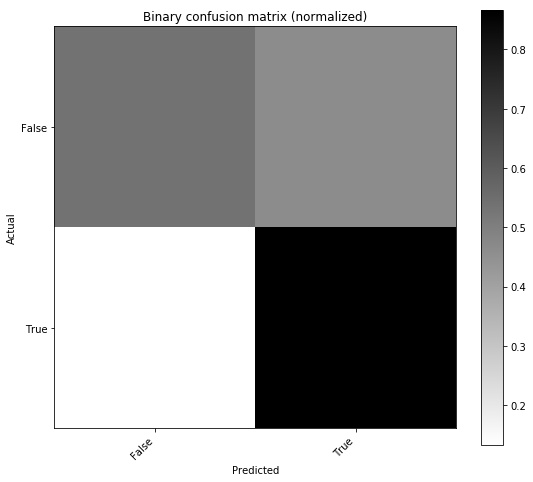

TP:  0.3939393939393939
FP:  0.25252525252525254
TN:  0.29292929292929293
FN:  0.06060606060606061
Accuracy:  0.6868686868686869
Recall:  0.8666666666666667
Precision:  0.609375


In [6]:
#annSGD

import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense, Activation, Convolution2D, Flatten, Dropout, MaxPooling2D
from keras.optimizers import SGD
import tensorflow as tf

import pandas_ml as pdml
import imblearn

df = pd.read_excel('Health.xlsx')
X=Health[['sen','jens','dard ghafase sineh','feshar khun dar halat esterahat','kolestrol','ghand khun nashta','navar ghalb dar halat esterahat','hadaksar zaraban ghalb','anjin sadri nashi az varzesh','afsordegi st nashi az tamrin va varzesh nesbat be halat esterahat','shibe tamrin dar oje tamrin dar maghtae ST','talasemi']]
y=Health['Outcome']

df.head()

from pandas_ml import ConfusionMatrix

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

data = scale(X)
pca = PCA(n_components=10)
X = pca.fit_transform(data)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

df = pdml.ModelFrame(X_train, target=y_train)
sampler = df.imbalance.over_sampling.SMOTE()
oversampled = df.fit_sample(sampler)
X, y = oversampled.iloc[:,1:11], oversampled['Outcome']
print(X)
print(y)
X=X.as_matrix()
y=y.as_matrix()

model = Sequential()
model.add(Dense(27, input_dim=10, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.summary()

h = model.fit(X, y, epochs=5, validation_data=(X_test, y_test))

print("Loss: ", model.evaluate(X_test, y_test, verbose=2))
y_predicted = np.round(model.predict(X_test)).T[0]
y_correct = np.array(y_test)

confusion_matrix = ConfusionMatrix(y_correct, y_predicted)
confusion_matrix.plot(normalized=True)
plt.show()
#confusion_matrix2.print_stats()

false_neg=0.0
false_pos=0.0
true_pos=0.0
true_neg=0.0
incorrect=0.0
total=len(y_predicted)

for i in range(len(y_predicted)):
	if y_predicted[i]!=y_correct[i] :
		incorrect+=1
		if y_predicted[i] == 1 and y_correct[i] == 0 :
			false_pos+=1
		else :
			false_neg+=1
	else :
		if y_predicted[i] == 1 and y_correct[i] == 1 :
			true_pos+=1
		else :
			true_neg+=1
print("TP: ", true_pos/total)
print("FP: ", false_pos/total)
print("TN: ", true_neg/total)
print("FN: ", false_neg/total)
inaccuracy = incorrect/total
accuracy = 1 - inaccuracy
print("Accuracy: ", accuracy)

recall = 0.0
recall = true_pos/(true_pos+false_neg)
precision = true_pos/(true_pos + false_pos )

print("Recall: ", recall)
print("Precision: ", precision)

C:\Users\Windows 10\AppData\Roaming\Python\Python36\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


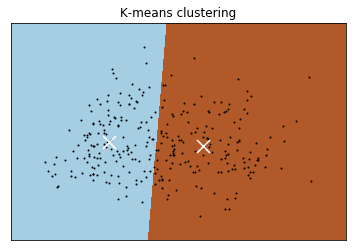

Accuracy: 0.5234899328859061
False negative rate (with respect to misclassifications):  0.8309859154929577
False negative rate (with respect to all the data):  0.3959731543624161
False negatives, false positives, mispredictions: 59 12 71
Total test data points: 149


In [13]:
#k_means

import numpy as np
import sklearn as sk
import pandas as pd

from sklearn.cluster import KMeans
from time import time
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

df = pd.read_excel('Health.xlsx')

X=Health[['sen','jens','dard ghafase sineh','feshar khun dar halat esterahat','kolestrol','ghand khun nashta','navar ghalb dar halat esterahat','hadaksar zaraban ghalb','anjin sadri nashi az varzesh','afsordegi st nashi az tamrin va varzesh nesbat be halat esterahat','shibe tamrin dar oje tamrin dar maghtae ST','talasemi']]
y=Health['Outcome']

X_scaled = scale(X)
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size = 0.5)

kmeans = KMeans(init='k-means++', n_clusters=2, n_init=100)
kmeans.fit(X_train)

# Step size of the mesh.
h = .01

# Plot the decision boundary and assign a color to each
#x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
#y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
#xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Plot Result
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(X_reduced[:, 0], X_reduced[:, 1], 'k.', markersize=2)

# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend()
plt.xticks(())
plt.yticks(())
plt.show()

predictions = kmeans.predict(X_test)

spred_fraud = np.where(predictions == 1)[0]
real_fraud = np.where(y_test == 1)[0]
false_pos = len(np.setdiff1d(spred_fraud, real_fraud))

pred_good = np.where(predictions == 0)[0]
real_good = np.where(y_test == 0)[0]
false_neg = len(np.setdiff1d(spred_fraud, real_good))

false_neg_rate = false_neg*1.0/(false_pos+false_neg)
accuracy = 0.0
accuracy = (len(X_test) - (false_neg + false_pos)) / (len(X_test)*1.0)
print("Accuracy:", accuracy)
print("False negative rate (with respect to misclassifications): ", false_neg_rate)
print("False negative rate (with respect to all the data): ", false_neg*1.0 / len(predictions))
print("False negatives, false positives, mispredictions:", false_neg, false_pos, false_neg + false_pos)
print("Total test data points:", len(X_test))

            0         1         2         3         4         5         6  \
0   -1.198919 -0.417791  0.955239  0.686363  0.645033 -0.610687 -0.751140   
1    1.120785 -1.091626 -0.503981 -1.269311  1.006655 -1.021362 -0.341310   
2    0.186778  0.833121 -0.780172 -0.574221 -0.696886  0.848519 -0.935133   
3    2.438157 -1.020851 -0.147659 -0.368733 -0.572271  0.550223 -0.339213   
4   -0.329830  2.366489 -0.688386  0.460835 -0.301890  0.403797 -0.636221   
5   -3.013211 -1.791375  0.847647  0.571082  0.053964  0.027447 -0.111876   
6   -1.765038 -0.607185  0.726494  0.612692  0.480759 -0.357055 -0.849122   
7    0.108139  1.813997 -1.502423 -0.337519  0.657882  1.266850 -1.464416   
8    2.441968 -0.748193  0.375689 -0.474477 -0.378958  0.042580 -0.715680   
9   -1.435881 -1.290632 -0.184165 -0.735547  0.027099 -0.655282  0.705879   
10  -1.839257  1.867578  0.319770 -0.552813  1.610644 -0.045007  1.919947   
11   2.827335 -0.688576 -0.376320 -0.329929 -0.349851  0.667523 -0.791204   

Train on 224 samples, validate on 99 samples
Epoch 1/5
224/224 [==============================] - 1s 2ms/step - loss: 0.6947 - acc: 0.5089 - val_loss: 0.6845 - val_acc: 0.4747
Epoch 2/5
224/224 [==============================] - 0s 163us/step - loss: 0.6614 - acc: 0.5714 - val_loss: 0.6575 - val_acc: 0.5455
Epoch 3/5
224/224 [==============================] - 0s 147us/step - loss: 0.6301 - acc: 0.6741 - val_loss: 0.6305 - val_acc: 0.6263
Epoch 4/5
224/224 [==============================] - 0s 161us/step - loss: 0.5944 - acc: 0.7321 - val_loss: 0.6012 - val_acc: 0.6667
Epoch 5/5
224/224 [==============================] - 0s 125us/step - loss: 0.5569 - acc: 0.7812 - val_loss: 0.5690 - val_acc: 0.7273
Loss:  [0.5689707278001188, 0.7272727278747944]


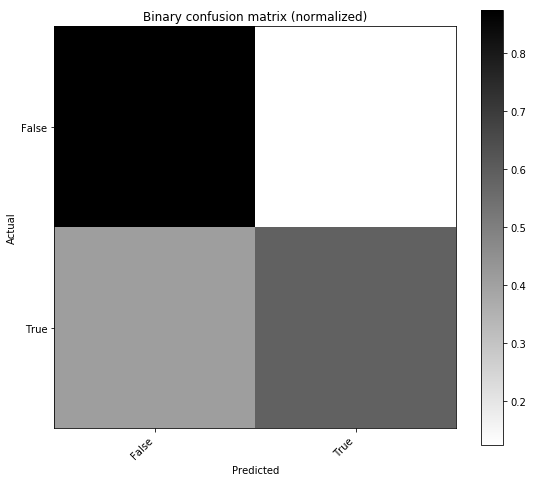

TP:  0.30303030303030304
FP:  0.06060606060606061
TN:  0.42424242424242425
FN:  0.21212121212121213
Accuracy:  0.7272727272727273
Recall:  0.5882352941176471
Precision:  0.8333333333333334


In [8]:
#annAdadelta

import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense, Activation, Convolution2D, Flatten, Dropout, MaxPooling2D
from keras.optimizers import SGD
import tensorflow as tf

import pandas_ml as pdml
import imblearn

df = pd.read_excel('Health.xlsx')
X=Health[['sen','jens','dard ghafase sineh','feshar khun dar halat esterahat','kolestrol','ghand khun nashta','navar ghalb dar halat esterahat','hadaksar zaraban ghalb','anjin sadri nashi az varzesh','afsordegi st nashi az tamrin va varzesh nesbat be halat esterahat','shibe tamrin dar oje tamrin dar maghtae ST','talasemi']]
y=Health['Outcome']

df.head()

from pandas_ml import ConfusionMatrix

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

data = scale(X)
pca = PCA(n_components=10)
X = pca.fit_transform(data)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

df = pdml.ModelFrame(X_train, target=y_train)
sampler = df.imbalance.over_sampling.SMOTE()
oversampled = df.fit_sample(sampler)
X, y = oversampled.iloc[:,1:11], oversampled['Outcome']
print(X)
print(y)
X=X.as_matrix()
y=y.as_matrix()

model = Sequential()
model.add(Dense(27, input_dim=10, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adadelta', metrics=['accuracy'])
model.summary()

h = model.fit(X, y, epochs=5, validation_data=(X_test, y_test))

print("Loss: ", model.evaluate(X_test, y_test, verbose=2))
y_predicted = np.round(model.predict(X_test)).T[0]
y_correct = np.array(y_test)

confusion_matrix = ConfusionMatrix(y_correct, y_predicted)
confusion_matrix.plot(normalized=True)
plt.show()
#confusion_matrix2.print_stats()

false_neg=0.0
false_pos=0.0
true_pos=0.0
true_neg=0.0
incorrect=0.0
total=len(y_predicted)

for i in range(len(y_predicted)):
	if y_predicted[i]!=y_correct[i] :
		incorrect+=1
		if y_predicted[i] == 1 and y_correct[i] == 0 :
			false_pos+=1
		else :
			false_neg+=1
	else :
		if y_predicted[i] == 1 and y_correct[i] == 1 :
			true_pos+=1
		else :
			true_neg+=1
print("TP: ", true_pos/total)
print("FP: ", false_pos/total)
print("TN: ", true_neg/total)
print("FN: ", false_neg/total)
inaccuracy = incorrect/total
accuracy = 1 - inaccuracy
print("Accuracy: ", accuracy)

recall = 0.0
recall = true_pos/(true_pos+false_neg)
precision = true_pos/(true_pos + false_pos )

print("Recall: ", recall)
print("Precision: ", precision)